# LORENTZ ATTRACTOR

## Runge-Kutta

In [1]:
def rk4m(x,y,h,n):
    Xlist = [x]
    Ylist = [y]
    for i in range(n):
        k0=f(x,y)
        k1=f(x+h/2.0,y+(h/2)*k0)
        k2=f(x+h/2.0,y+(h/2)*k1)
        k3=f(x+h, y+h*k2)
        # yeni x ve y değerlerini hesapla
        y=y+(h/6)*(k0+2.0*k1+2.0*k2+k3)
        x=x+h
        # hesaplanan x ve y değerlerini
        # xd, yd listelerine ekle
        Xlist.append(x)
        Ylist.append(y)
    return Xlist, Ylist

## Solve the equations

In [2]:
# Aynı programın yeniden düzenlenmiş hali
import numpy as np

def f(x, y):
    # y[0]-->x, y[1]-->y, y[2]-->z
    dxdt =  sigma*(y[1] - y[0])
    dydt = -y[0]*y[2] + rr*y[0] - y[1]
    dzdt = y[0]*y[1] - bb*y[2]
    return np.array([dxdt, dydt, dzdt])

h = 0.01
n = 2000
dn = 500
x0 = 0.0
y0 = np.array([1., 1., 20.])

sigma, bb, rr = 10., 8./3., 28.
Xlist, Ylist = rk4m(x0, y0, h, n)

Ylist = np.array(Ylist)
Xs = Ylist[0:,0]
Ys = Ylist[0:,1]
Zs = Ylist[0:,2]

## Plot in 2D

         t            X            Y            Z
     0.000        1.000        1.000       20.000
     5.000       -8.968       -2.812       33.958
    10.000        3.253        5.626       12.418
    15.000        6.693        2.041       30.482


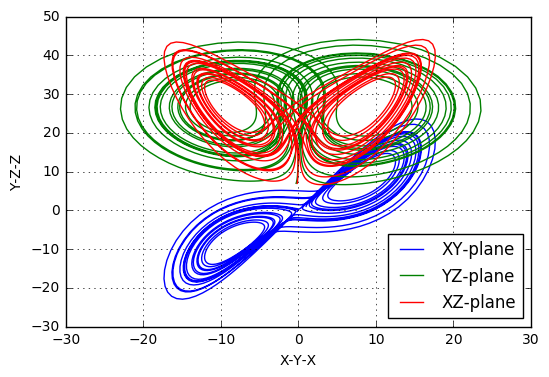

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

print "%10s %12s %12s %12s"%("t","X","Y","Z")
for i in range(0, n, dn):
    print "%10.3f %12.3f %12.3f %12.3f"%(Xlist[i], Xs[i], Ys[i], Zs[i])

plt.plot(Xs, Ys, label='XY-plane')
plt.plot(Ys, Zs, label='YZ-plane')
plt.plot(Xs, Zs, label='XZ-plane')
plt.xlabel('X-Y-X')
plt.ylabel('Y-Z-Z')
plt.grid()
plt.legend(loc='best')
plt.show()

## Plot in 3D

In [5]:
# The code in the following link is 
# used to draw Lorentz Attractor in 3D.
# https://plot.ly/python/3d-line-plots/
#
# Colormaps:
# https://plot.ly/python/cmocean-colorscales/#haline
#
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode() # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

trace = go.Scatter3d(
    x=Xs, y=Ys, z=Zs,
    marker=dict(
        size=2,
        color=Zs,
        colorscale='Electric',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

data = [trace]

layout = dict(
    width=1000,
    height=900,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            #backgroundcolor='rgb(230, 230,230)' # gray
            backgroundcolor='rgb(120, 255, 150)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            #backgroundcolor='rgb(230, 230,230)'
            backgroundcolor='rgb(255, 120, 100)'
            
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(100, 200, 255)',
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=1.0 ),
        aspectmode = 'manual'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig)